<a href="https://colab.research.google.com/github/arthuravilez/mackenzie/blob/master/Exercicio_tarefa_trilha1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VALIDAÇÃO DA LEI DE ZIPF POR PLOTAGEM DE FREQÜÊNCIA DE PALAVRAS**
A distribuição de frequência de palavras pode ser considerada como uma das análises estatísticas básicas que podem ser feitas em dados de texto.
A Lei de Zipf é uma distribuição de probabilidade discreta para a frequência das palavras no corpus ou, em outros termos, probabilidade de encontrar uma palavra no corpus. A classificação é feita de forma que a classificação 1 seja atribuída à palavra mais frequente, a classificação 2 à próxima frequente e assim por diante. Isso também indica que a lei de Zipf segue a distribuição da lei de potência.
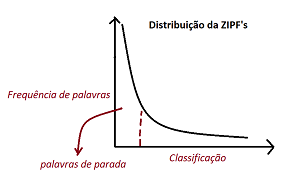

Como você pode ver no gráfico acima, as palavras do Language Builder (por exemplo: is, an, the) ou palavras que podem ser chamadas de Palavras de parada seriam as palavras mais frequentes em seu conjunto de dados e as palavras menos significativas, uma vez que não adicione qualquer informação útil.

Neste bloco de notas, podemos validar a lei de Zipf, se ela se aplica ao nosso gráfico traçando as frequências das palavras.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importando o módulo de string
import string
from nltk import FreqDist
from nltk.corpus import stopwords


In [2]:
#Para ignorar mensagens de aviso
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Para exibir a coluna de texto completo em vez de truncá-la
pd.set_option('display.max_colwidth', -1)

In [4]:
#Lendo o arquivo do treino.csv
df = pd.read_csv("treino.csv")

In [5]:
#Dataframe
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [6]:
#Dimensão do dataframe
df.shape

(5, 3)

In [7]:
#Python fornece uma constante chamada string.punctuation que fornece uma grande lista de caracteres de pontuação. 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
def remove_pontuacao(input_col):
    """Para remover todas as pontuações presentes no texto. Insira a coluna de texto"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

In [9]:
#Aplicando a função remove_pontuacao
df['text'] = df['text'].apply(remove_pontuacao)

In [22]:
def constroi_campo(text_col):
    """Para construir o campo de texto juntando todos os registros. Insira a coluna de texto"""
    campo = ""
    for sent in text_col:
        campo += sent
    return campo

In [23]:
#Construindo o campo
campo = build_corpus(df['text'])

In [24]:
#Convertendo todas as palavras em minúsculas
campo = campo.lower()

In [25]:
#Alguma parte do Text campo
campo[:1000]

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wallit never once occurred to me that the fumbling might be a mere mistakein his left hand was a gold snuff box from which as he capered down the hill cutting all manner of fantastic steps he took snuff incessantly with an air of the greatest possible self satisfactionhow lovely is spring as we looked from windsor terrace on the sixteen fertile counties spread beneath speckled by happy cottages and wealthier towns all looked as in former years heart cheering and fairfinding nothing else not even gold the superintendent abandoned his attempts but a perplexed look occasionally steals over his countenance as he sits thinking at his desk'

Se você olhar o campo, verá que estamos tendo o campo de texto limpo a partir de agora. Iremos em frente e criaremos uma lista de palavras agora.

In [26]:
#Dividindo todo o campo
campo = campo.split()

In [27]:
#Observando as primeiras palavras
print(campo[:50])

['this', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', 'as', 'i', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'the', 'point', 'whence', 'i', 'set', 'out', 'without', 'being', 'aware', 'of', 'the', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wallit', 'never', 'once', 'occurred', 'to', 'me', 'that', 'the', 'fumbling', 'might']


In [28]:
def plot_palavra_frequente(words,top_n=10):
    """Função para traçar as frequências das palavras"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Palavras mais frequentes do corpus - incluindo STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

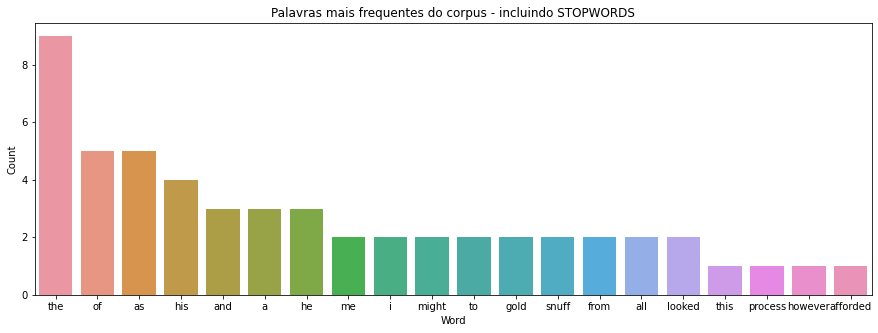

In [29]:
plot_palavra_frequente(campo,20)

Você pode descobrir que, a maioria das palavras presentes aqui na lista que ocorre no topo são  (palavras de parada) e a palavra mais frequente aqui é o e isso é óbvio. Isso está de acordo com o que esperávamos - As palavras mais frequentes no campo.

Link para verificar o código:

`https://github.com/arthuravilez/Django-3-by-Example/blob/master/Exercicio_tarefa_trilha1.ipynb`